# Correlation between Musical Notes and Socio-Political Events 

In [91]:
import os
import numpy as np
import pandas as pd
import librosa
import antropy as ant
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as pltstyle 
import matplotlib as mpl
import matplotlib.colors as mpc
import mplcatppuccin
from librosa import display
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm 

In [3]:
%matplotlib inline
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [ ]:
all_paths = np.sort(os.listdir("music_files/"))
all_paths

## Features Calculation Functions

In [45]:
def spectral_rolloff(audio_name):
    samples, sampling_rate = librosa.load(f"music_files/{audio_name}")
    spc_rolloff = librosa.feature.spectral_rolloff(y=samples) * 0.000001
    return np.mean(spc_rolloff)

In [44]:
def spectral_centroid(audio_name):
    samples, sampling_rate = librosa.load(f"music_files/{audio_name}")    
    spc_centroid = librosa.feature.spectral_centroid(y=samples) * 0.000001
    return np.mean(spc_centroid)

In [47]:
def spectral_flux(audio_name):
    samples, sampling_rate = librosa.load(f"music_files/{audio_name}")    
    spc_flux = librosa.onset.onset_strength(y=samples, sr=sampling_rate)
    return np.mean(spc_flux)

In [42]:
def entropy(audio_name):
    samples, sampling_rate = librosa.load(f"music_files/{audio_name}")    
    ent = ant.spectral_entropy(samples, sampling_rate, method='fft', normalize=True)
    return ent

In [41]:
def energy(audio_name):
    hop_length = 512
    frame_length = 2048
    samples, sampling_rate = librosa.load(f"music_files/{audio_name}") 
    e = np.array([
        sum(abs(samples[i:i+frame_length]**2))
        for i in range(0, len(samples), hop_length)
    ])
    return np.mean(e)

In [40]:
def zero_crossing_rate(audio_name):
    samples, sampling_rate = librosa.load(f"music_files/{audio_name}") 
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=samples))
    return zcr

## Testing the Functions

In [48]:
blues_zero_spc_rolloff = spectral_rolloff("blues.00000.au")
blues_zero_spc_centroid = spectral_centroid("blues.00000.au")
blues_zero_spc_flux = spectral_flux("blues.00000.au")
blues_zero_energy = energy("blues.00000.au")
blues_zero_entropy = entropy("blues.00000.au")
blues_zero_zcr = zero_crossing_rate("blues.00000.au")

print(blues_zero_spc_rolloff)
print(blues_zero_spc_centroid)
print(blues_zero_energy)

print(blues_zero_spc_flux)
print(blues_zero_entropy)
print(blues_zero_zcr)

0.0038057230301080333
0.0017841226412753102
40.51993332358476
1.3917768
0.7885955315558651
0.08304482066898686


## Amplitude Example

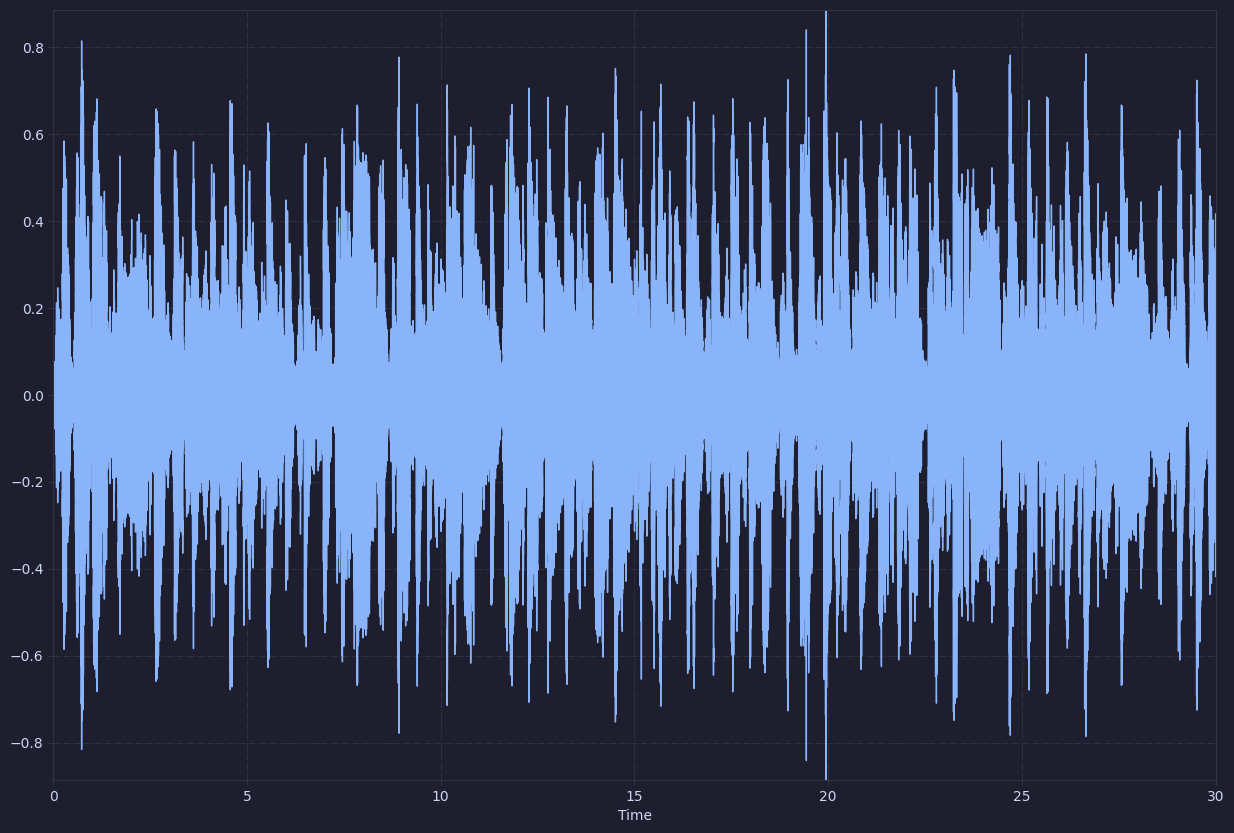

In [9]:
mpl.style.use("mocha")
samples, sampling_rate = librosa.load(f"music_files/blues.00000.au", sr=None, mono=True, offset=0.0, duration=None)
plt.figure(figsize=(15, 10), dpi=100)
plt.grid(linestyle='-.', linewidth=0.7)
librosa.display.waveshow(y=samples, sr=sampling_rate)
plt.savefig("Amplitude.png")

## Zero Crossing Rate Example

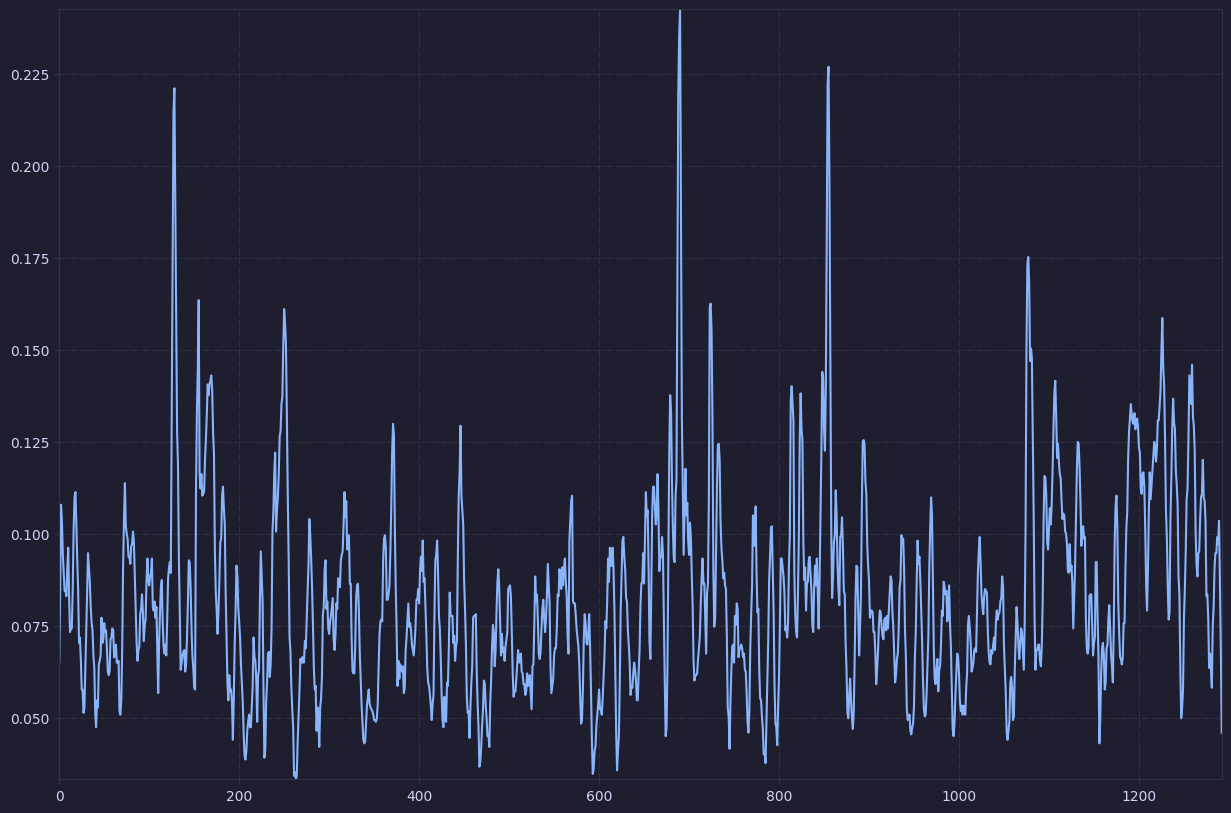

In [11]:
mpl.style.use("mocha")
samples, sampling_rate = librosa.load(f"music_files/blues.00000.au", sr=None, mono=True, offset=0.0, duration=None)
zero_crossings = librosa.zero_crossings(samples, pad=False)
zero_crossing_rate = librosa.feature.zero_crossing_rate(samples)
plt.figure(figsize=(15, 10), dpi=100)
plt.grid(linestyle='-.', linewidth=0.7)
plt.plot(zero_crossing_rate[0], linewidth=1.5)
plt.savefig("ZeroCrossingRate.png")

## Fast Fourier Transform Example

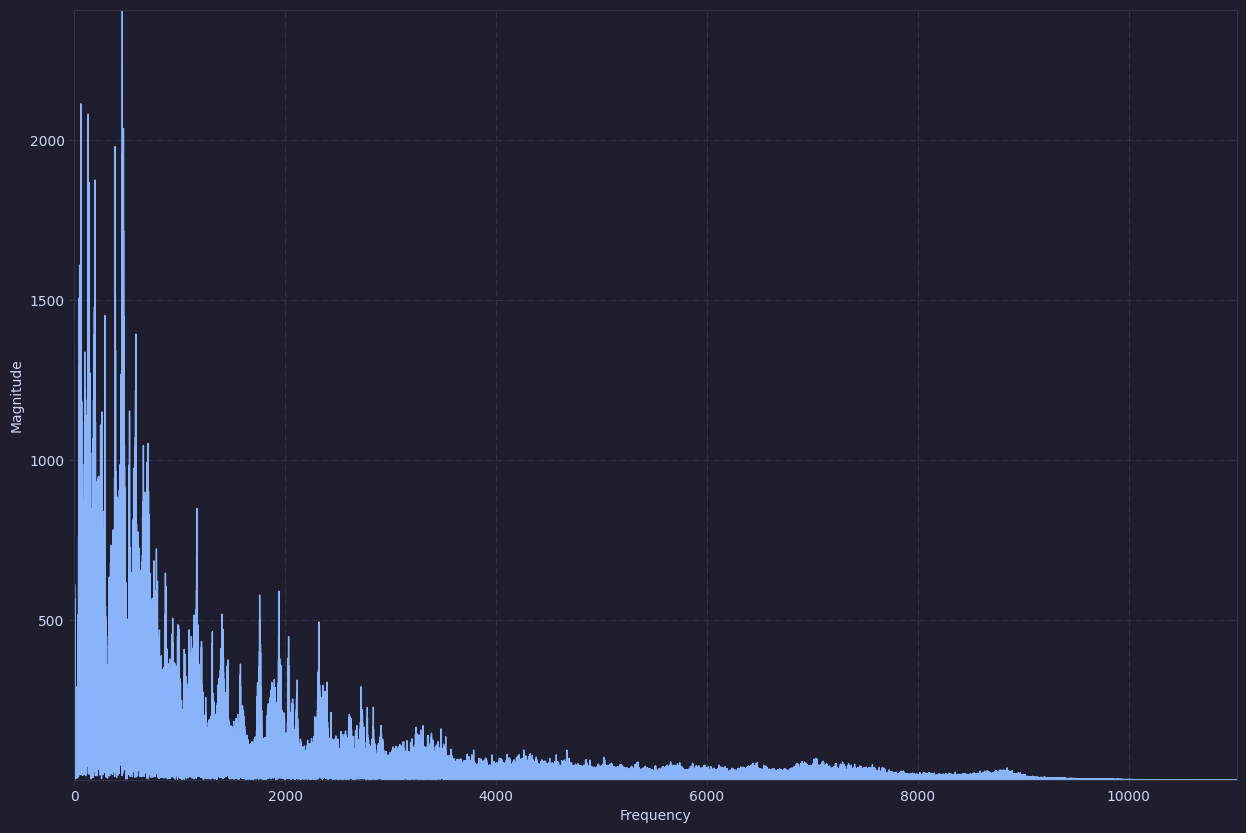

In [12]:
mpl.style.use("mocha")
samples, sampling_rate = librosa.load(f"music_files/blues.00000.au", sr=None, mono=True, offset=0.0, duration=None)
fft = np.fft.fft(samples)
spectrum = np.abs(fft)
f = np.linspace(0, sampling_rate, len(spectrum))
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
plt.figure(figsize=(15, 10), dpi=100)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.grid(linestyle='-.', linewidth=0.7)
plt.plot(left_f, left_spectrum, linewidth=1)
plt.savefig("FFT.png")

In [49]:
df = pd.read_csv("musicdates.csv")
df

name    year    wp
0    blues.00000.au  1966.0     I
1    blues.00001.au  1966.0     I
2    blues.00002.au  1968.0  FDIC
3    blues.00003.au  1966.0     I
4    blues.00004.au  1965.0     I
..              ...     ...   ...
695   rock.00095.au  1989.0     I
696   rock.00096.au  1989.0     I
697   rock.00097.au  1989.0     I
698   rock.00098.au  1989.0     I
699   rock.00099.au  1989.0     I

[700 rows x 3 columns]

In [ ]:
df['spc_rolloff'] = list(map(lambda x: spectral_rolloff(x),df['name']))

In [ ]:
df['spc_centroid'] = list(map(lambda x: spectral_centroid(x),df['name']))

In [ ]:
df['spc_flux'] = list(map(lambda x: spectral_flux(x),df['name']))

In [ ]:
df['energy'] = list(map(lambda x: energy(x),df['name']))

In [ ]:
df['entropy'] = list(map(lambda x: entropy(x),df['name']))

In [ ]:
df['zcr'] = list(map(lambda x: zero_crossing_rate(x),df['name']))

In [63]:
df

name    year    wp  spc_rolloff  spc_centroid  spc_flux  \
0    blues.00000.au  1966.0     I     0.003806      0.001784  1.391777   
1    blues.00001.au  1966.0     I     0.003551      0.001530  1.445264   
2    blues.00002.au  1968.0  FDIC     0.003042      0.001553  1.638602   
3    blues.00003.au  1966.0     I     0.002185      0.001070  1.248168   
4    blues.00004.au  1965.0     I     0.003580      0.001835  1.645293   
..              ...     ...   ...          ...           ...       ...   
695   rock.00095.au  1989.0     I     0.004254      0.002008  1.174456   
696   rock.00096.au  1989.0     I     0.004149      0.002007  1.085596   
697   rock.00097.au  1989.0     I     0.004032      0.002078  1.057906   
698   rock.00098.au  1989.0     I     0.003016      0.001399  1.152354   
699   rock.00099.au  1989.0     I     0.003247      0.001610  1.016839   

        energy   entropy       zcr  
0    40.519933  0.788596  0.083045  
1    23.689999  0.740042  0.056040  
2    68.662830  0.791746  0.076291  
3    53.691312  0.596274  0.033309  
4    21.855439  0.822315  0.101461  
..         ...       ...       ...  
695  13.634738  0.725575  0.089227  
696  13.168205  0.761462  0.097664  
697  14.299253  0.802776  0.121823  
698  16.811812  0.670771  0.048724  
699   6.755239  0.697809  0.076305  

[700 rows x 9 columns]

## Exploratory Data Analysis

In [64]:
df.shape

(700, 9)

In [99]:
df.describe().to_csv("describe.csv")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          700 non-null    object 
 1   year          675 non-null    float64
 2   wp            675 non-null    object 
 3   spc_rolloff   700 non-null    float64
 4   spc_centroid  700 non-null    float64
 5   spc_flux      700 non-null    float32
 6   energy        700 non-null    float64
 7   entropy       700 non-null    float64
 8   zcr           700 non-null    float64
dtypes: float32(1), float64(6), object(2)
memory usage: 46.6+ KB


In [67]:
df.duplicated().sum()

0

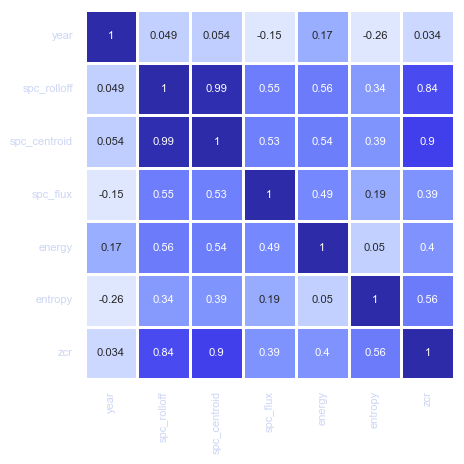

In [72]:
sns.set_style("whitegrid")
sns.set_context("paper")

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =mpc.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#dfe7ff', '#a1b6ff', '#7386fd', '#413fec', '#2d2ba8']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = mpc.LinearSegmentedColormap('test', cdict)

# labels = ["rated", "turns", "white elo", "black elo", "opening move nbr", "did castle", "both castled", "nbr of checks", "average elo", "winner"]

plt.figure()
sns.heatmap(
        cbar=False,
        vmin=0.0,
        vmax=1.0,
        annot=True,
        square=True, 
        annot_kws={"size": 8},
        data=df.corr(numeric_only=True),
        cmap=cm,
        linewidths=0.75)


plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.savefig("HeatmapCorrelation.png")

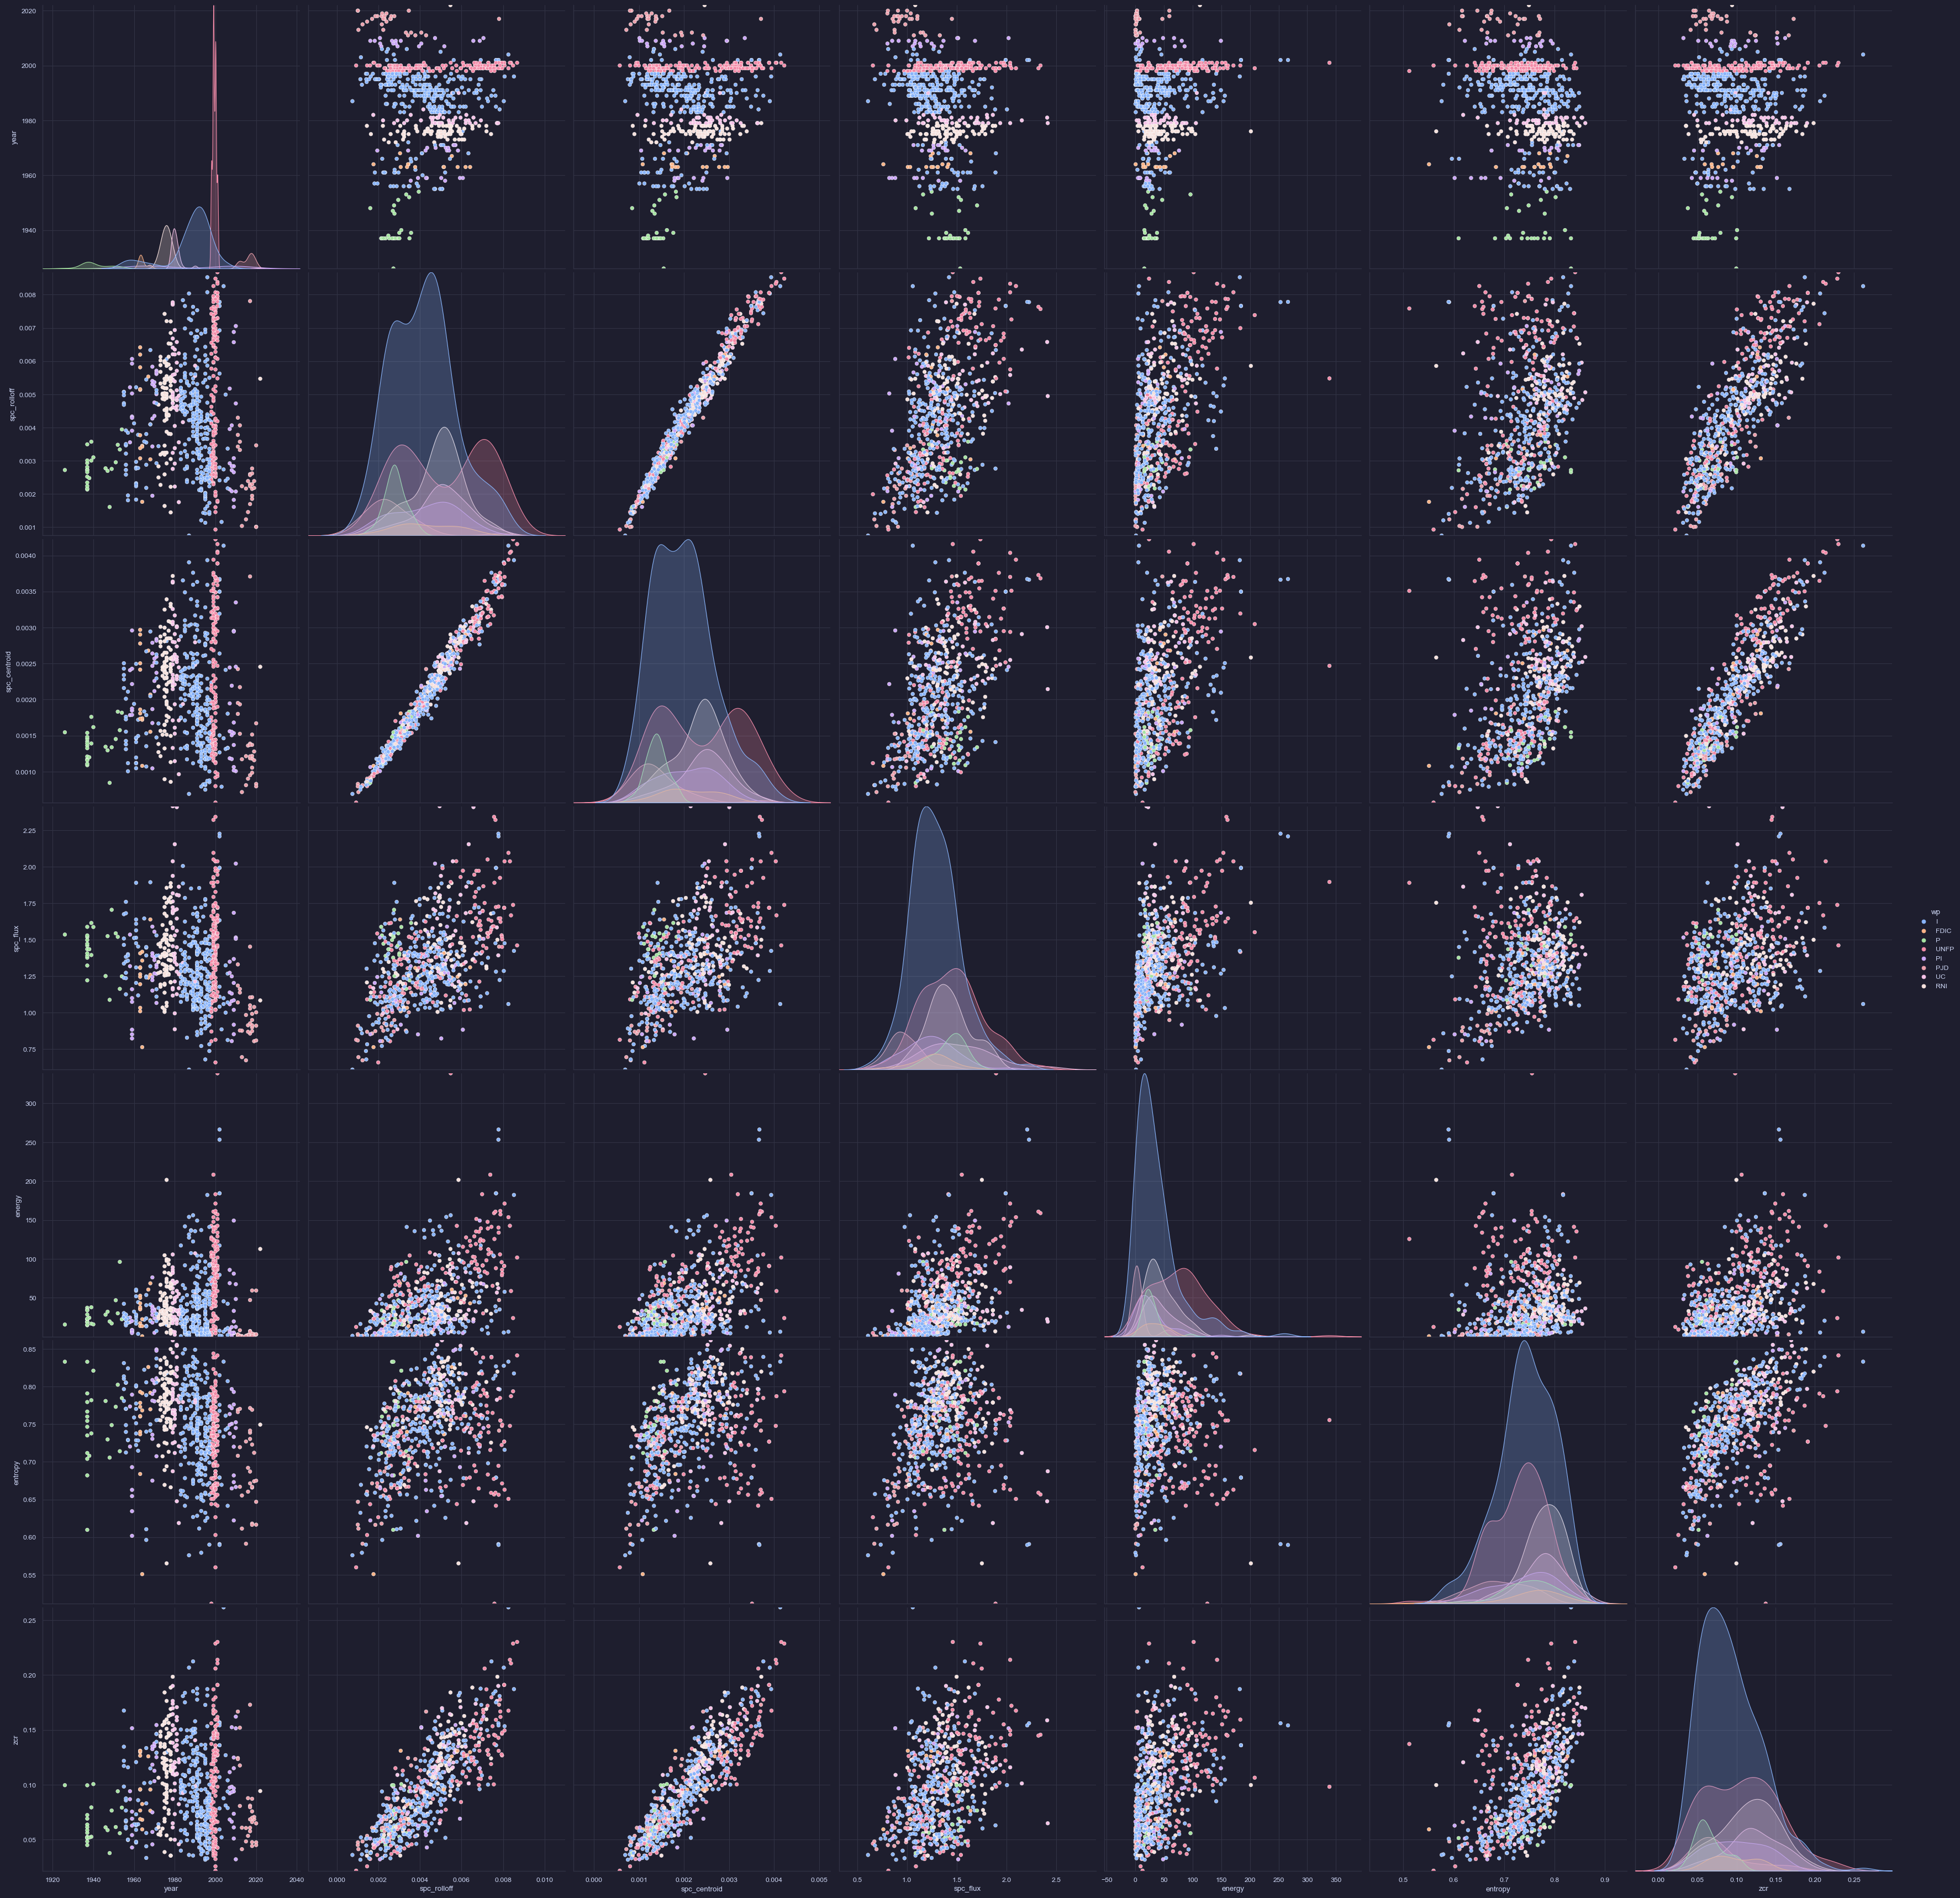

In [74]:
plt.style.use("mocha")
sns.pairplot(df, hue='wp', height=5)
plt.savefig("Pairplot")

In [78]:
df.isnull().values.any()

In [83]:
df.dropna(inplace=True)

In [84]:
df.isnull().values.any()

False

## k-NN Predictions

In [85]:
x = df.drop(["wp", "name"], axis=1)
y = df["wp"]

MinMaxScaler = preprocessing.MinMaxScaler()
minmax_x = MinMaxScaler.fit_transform(x)

data = pd.DataFrame(minmax_x, columns=["zcr", "spc_rolloff", "spc_centroid", "spc_flux", "entropy", "energy", "year"])

In [86]:
data

zcr  spc_rolloff  spc_centroid  spc_flux   entropy    energy  \
0    0.416667     0.385468      0.332075  0.433424  0.119303  0.791698   
1    0.416667     0.353302      0.262622  0.463030  0.069591  0.652887   
2    0.437500     0.289187      0.268797  0.570047  0.202430  0.800706   
3    0.416667     0.181022      0.136741  0.353933  0.158208  0.241872   
4    0.406250     0.356990      0.346030  0.573751  0.064173  0.888096   
..        ...          ...           ...       ...       ...       ...   
670  0.656250     0.441964      0.393374  0.313132  0.039891  0.611529   
671  0.656250     0.428789      0.393005  0.263946  0.038513  0.714125   
672  0.656250     0.413950      0.412358  0.248619  0.041853  0.832239   
673  0.656250     0.285805      0.226614  0.300898  0.049275  0.454850   
674  0.656250     0.314983      0.284379  0.225888  0.019570  0.532150   

         year  
0    0.255680  
1    0.143131  
2    0.227533  
3    0.048395  
4    0.332431  
..        ...  
670  0.281447  
671  0.316609  
672  0.417294  
673  0.112642  
674  0.227589  

[675 rows x 7 columns]

In [87]:
x_training, x_testing, y_training, y_testing = train_test_split(data, y, test_size=0.8, random_state=1)

knn = KNeighborsClassifier()
knn.fit(x_training, y_training)

prediction = knn.predict(x_testing)

In [104]:
cr = classification_report(y_testing, prediction)
print(f"Classification Report: \n {cr}")

accuracy = accuracy_score(y_testing, prediction)
print(f"Accuracy: {accuracy}")


Classification Report: 
               precision    recall  f1-score   support

        FDIC       0.25      0.20      0.22        10
           I       0.60      0.70      0.64       240
           P       0.55      1.00      0.71        17
          PI       0.40      0.07      0.11        30
         PJD       0.00      0.00      0.00        27
         RNI       0.44      0.58      0.50        67
          UC       0.00      0.00      0.00        37
        UNFP       0.60      0.61      0.60       112

    accuracy                           0.55       540
   macro avg       0.35      0.39      0.35       540
weighted avg       0.49      0.55      0.51       540

Accuracy: 0.5462962962962963


## SVM Predictions

In [89]:
x_svm = df.drop(['wp', 'name'], axis=1)
y_svm = df['wp']

xsvm_training, xsvm_testing, ysvm_training, ysvm_testing = train_test_split(x_svm, y_svm, train_size=0.8, random_state=1)

In [92]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(xsvm_training, ysvm_training)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(xsvm_training, ysvm_training)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(xsvm_training, ysvm_training)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(xsvm_training, ysvm_training)

In [93]:
linear_pred = linear.predict(xsvm_testing)
rbf_pred = rbf.predict(xsvm_testing)
poly_pred = poly.predict(xsvm_testing)
sig_pred = sig.predict(xsvm_testing)

In [103]:
linear_cr = classification_report(ysvm_testing, linear_pred)
print(f"Classification Report: \n {linear_cr}")

linear_accuracy = accuracy_score(ysvm_testing, linear_pred)
print(f"Accuracy: {linear_accuracy}")

Classification Report: 
               precision    recall  f1-score   support

        FDIC       0.00      0.00      0.00         2
           I       0.61      0.91      0.73        55
           P       1.00      1.00      1.00         5
          PI       0.00      0.00      0.00         7
         PJD       0.90      1.00      0.95         9
         RNI       0.00      0.00      0.00        17
          UC       0.00      0.00      0.00        10
        UNFP       0.79      1.00      0.88        30

    accuracy                           0.70       135
   macro avg       0.41      0.49      0.44       135
weighted avg       0.52      0.70      0.59       135

Accuracy: 0.6962962962962963


/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

In [95]:
rbf_cr = classification_report(ysvm_testing, rbf_pred)
print(f"Classification Report: \n {rbf_cr}")

rbf_accuracy = accuracy_score(ysvm_testing, rbf_pred)
print(f"Accuracy: {rbf_accuracy}")

Classification Report: 
               precision    recall  f1-score   support

        FDIC       0.00      0.00      0.00         2
           I       0.50      1.00      0.67        55
           P       1.00      0.20      0.33         5
          PI       1.00      0.29      0.44         7
         PJD       1.00      0.22      0.36         9
         RNI       1.00      0.18      0.30        17
          UC       0.50      0.10      0.17        10
        UNFP       1.00      0.53      0.70        30

    accuracy                           0.59       135
   macro avg       0.75      0.31      0.37       135
weighted avg       0.75      0.59      0.54       135

Accuracy: 0.5925925925925926


/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

In [96]:
sig_cr = classification_report(ysvm_testing, sig_pred)
print(f"Classification Report: \n {sig_cr}")

sig_accuracy = accuracy_score(ysvm_testing, sig_pred)
print(f"Accuracy: {sig_accuracy}")

Classification Report: 
               precision    recall  f1-score   support

        FDIC       0.00      0.00      0.00         2
           I       0.41      1.00      0.58        55
           P       0.00      0.00      0.00         5
          PI       0.00      0.00      0.00         7
         PJD       0.00      0.00      0.00         9
         RNI       0.00      0.00      0.00        17
          UC       0.00      0.00      0.00        10
        UNFP       0.00      0.00      0.00        30

    accuracy                           0.41       135
   macro avg       0.05      0.12      0.07       135
weighted avg       0.17      0.41      0.24       135

Accuracy: 0.4074074074074074


/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

In [97]:
poly_cr = classification_report(ysvm_testing, poly_pred)
print(f"Classification Report: \n {poly_cr}")

poly_accuracy = accuracy_score(ysvm_testing, poly_pred)
print(f"Accuracy: {poly_accuracy}")

Classification Report: 
               precision    recall  f1-score   support

        FDIC       0.00      0.00      0.00         2
           I       0.41      1.00      0.58        55
           P       0.00      0.00      0.00         5
          PI       0.00      0.00      0.00         7
         PJD       0.00      0.00      0.00         9
         RNI       0.00      0.00      0.00        17
          UC       0.00      0.00      0.00        10
        UNFP       0.00      0.00      0.00        30

    accuracy                           0.41       135
   macro avg       0.05      0.12      0.07       135
weighted avg       0.17      0.41      0.24       135

Accuracy: 0.4074074074074074


/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hya/.local/share/virtualenvs/correlation-music-socio-political-iVlIfEjW/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in label

In [98]:
linear_accuracy = accuracy_score(ysvm_testing, linear_pred)
rbf_accuracy = accuracy_score(ysvm_testing, rbf_pred)
poly_accuracy = accuracy_score(ysvm_testing, poly_pred)
sig_accuracy = accuracy_score(ysvm_testing, sig_pred)

print(f"Linear Accuracy: {linear_accuracy}")
print(f"RBF Accuracy: {rbf_accuracy}")
print(f"Poly Accuracy: {poly_accuracy}")
print(f"Sig Accuracy: {sig_accuracy}")

Linear Accuracy: 0.6962962962962963
RBF Accuracy: 0.5925925925925926
Poly Accuracy: 0.4074074074074074
Sig Accuracy: 0.4074074074074074
